In [2]:
from google.colab import drive
# connect to drive: if success, a window will pop up to let you click and choose the account.
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
ROOT_DIR = "/content/drive/MyDrive/wb_localization_dataset"

In [4]:
#install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

- More details about YOLOv8's architecture can be found on the internet
- YOLOv8 có nhiều biến thể: nano, small, medium, big,.... => để triển khai trên các thiết bị có phần cứng khác nhau như camera siêu nhỏ thì chip cũng siêu nhỏ, thì chỉ nên dùng yolov8 nano kiểu vậy. Còn đâu có cái GPU to, phần cứng tính toán to hơn có thể dùng yolov8 big => các phiên bản YOLO kiến trúc cơ bản giống nhau nhưng có thể khác nhau một vài chi tiết nào đó => ai đam mê thì lên mạng đọc
- Trong paper, của thầy thì thầy thử nghiệm các phiên bản khác nhau của YOLOv8 với bộ siêu tham số (hyperparameters) giống nhau như dưới:
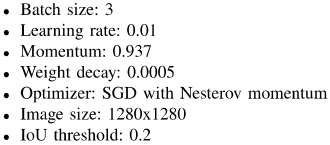

- Kết quả của thầy là YOLOv5x xịn nhất nhưng tốn thời gian nhất vì nó to nhất, nên t đã train theo model có kết quả xịn thứ 2 là YOLOv5m
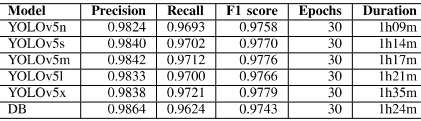

- Bọn m thích train gì thì train, thử nghiệm với bộ siêu tham số nào cũng được, thử YOLOv5n hay YOLOv5s nào cũng được miễn là khác để chứng tỏ với thầy là bọn em có thử nhiều bộ khác nhau - tối nay t đang bận chưa chia được nên bọn m có thể làm cái khác trước, trưa mai 1h chiều t sẽ post lên là ai thử với cái gì sau.

In [5]:
import os

from ultralytics import YOLO

# if train from scratch, do like this below => it can be understood as initializing the model with parameters
# yolov8 cũng có các họ nano - medium - small - .... => phía dưới load yolov8m
model = YOLO("yolov8l.pt")
#nếu load model đã pretrain => t đã đổi tên model trưa nay t show cho bọn m
#model = YOLO("/content/drive/MyDrive/wb_localization_dataset/best_YOLOv8_30_4_2024_v2_Ha.pt")

100%|██████████| 83.7M/83.7M [00:00<00:00, 240MB/s]


- Tài liệu: ultralytics -> https://docs.ultralytics.com/modes/train/
- Train thì để đó đi làm việc khác không mất kết nối mạng là được - nhưng nếu chạy xong cell này mà m quên k vào lại notebook này quá 30ph hay 45ph gì đó thì nó sẽ tự động runtime disconnected và toang => đi làm việc khác nhưng vẫn phải để ý
- Lúc nó chạy (XIN NHẮC LẠI: chỉ lúc nó chạy thì nó sẽ có folder "runs" => bọn m click vào biểu tượng thứ 4 dưới cùng để xem folder đó
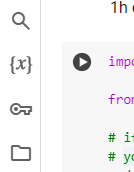

- Lưu file runs đó theo hướng dẫn của Lâm trong nhóm hoặc tải bằng tay như t trưa nay tất cả các file trong này: runs thì sẽ có train hoặc val => m k tải thì sau này mở lại notebook này nó sẽ mất dù m đã train rồi

In [6]:
# bắt đầu train thì chạy cell này => truyền các siêu tham số phải đúng thứ tự => thứ tự như nào đọc doc của ultralytics
results = model.train(data = os.path.join (ROOT_DIR, "12_5_config.yaml"), epochs = 100,
            batch = 16,
            pretrained = True,
            imgsz = 640,
            optimizer = 'AdamW',
            lr0 = 0.01,
            momentum = 0.937, weight_decay = 0.0005)

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/wb_localization_dataset/12_5_config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

100%|██████████| 755k/755k [00:00<00:00, 75.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/wb_localization_dataset_retrain_200e_Ha/labels/train.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/wb_localization_dataset_retrain_200e_Ha/labels/val.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.5G      3.366      3.546      1.656        918        640: 100%|██████████| 3/3 [00:09<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.89s/it]

                   all         14       3204          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.3G      3.594      3.592      1.687       1981        640: 100%|██████████| 3/3 [00:10<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.4G      2.421       3.88      1.191       1949        640: 100%|██████████| 3/3 [00:10<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.2G      3.677       23.1      1.493       1208        640: 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.3G      3.167      7.003      1.333       1606        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.4G      3.197      1.837      1.475       1118        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.9G      2.836      1.753      1.247       1961        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.1G      2.572       1.22      1.165       1898        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.2G      2.543      1.141       1.19       1948        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.4G      2.195      1.038       1.12       1586        640: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.8G      2.217      1.109      1.127       1249        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.2G      2.239      1.041      1.088       1419        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.6G      2.118      1.022        1.1       1436        640: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.2G      1.975     0.9608      1.055       1462        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.1G      1.952     0.9762      1.032       2512        640: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        13G      1.872     0.9169      1.027       1361        640: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.3G      2.005     0.9697      1.009       2426        640: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.4G      1.763     0.8726     0.9803       2120        640: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.6G      1.755     0.8788      1.003       1197        640: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.9G      1.742     0.8855      1.007       1411        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.2G      1.928     0.9007      1.011       1970        640: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        13G      1.854     0.8784      1.017       1863        640: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.6G      1.742     0.8754       1.02       1353        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.6G      1.777     0.8296      1.016       1539        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.6G      1.685     0.8171      1.005       1241        640: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.3G      1.826     0.8625      1.011       1693        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        12G      1.823     0.8167     0.9798       2456        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.9G      1.582     0.7861     0.9827       1186        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.7G      1.783     0.8157     0.9743       1226        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.2G      1.559     0.7318     0.9663       1419        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.4G      1.794     0.8382     0.9779       1579        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.6G      1.754     0.7791     0.9883       1841        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.2G      1.726      0.791      0.969       2067        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.2G      1.777      0.875     0.9932       2098        640: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.4G      1.747     0.7943     0.9912       1821        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.8G      1.676      0.826     0.9878       1303        640: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.3G      1.543     0.7487     0.9718       1454        640: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        12G      1.619     0.7897     0.9737       1320        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.8G      1.598     0.7653      0.973       1500        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.8G       1.71     0.8415     0.9618       2806        640: 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.4G       1.52     0.7249     0.9408       1499        640: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.3G      1.686     0.8027      1.002       1278        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        13G      1.408     0.6732      0.905       1932        640: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.7G      1.368     0.7237     0.9265       1969        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        13G       1.37     0.6874     0.9283       1400        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.7G      1.467     0.7118     0.9379       1467        640: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.6G      1.469     0.6956     0.9167       1641        640: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.4G      1.356     0.6443     0.9211       1893        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.8G       1.34     0.6419     0.9092       2346        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         14       3204     0.0786      0.103     0.0514     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.4G      1.441     0.6699     0.9391       1369        640: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         14       3204   0.000238   0.000312   0.000119   4.77e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.2G      1.553     0.7528     0.9429       2060        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         14       3204     0.0271     0.0331     0.0131    0.00693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.6G      1.423     0.6684     0.9511       1287        640: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         14       3204      0.197      0.208      0.107     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.4G      1.321     0.6453     0.9058       1491        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         14       3204      0.197      0.208      0.107     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.2G      1.377     0.6502     0.9262       1407        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         14       3204      0.373      0.392      0.281      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.2G       1.55     0.6951     0.9505       2025        640: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         14       3204      0.456      0.359       0.29      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.4G       1.43     0.6637     0.9433       1806        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         14       3204       0.18      0.211      0.104      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        13G       1.35     0.6174     0.9277       1708        640: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         14       3204       0.18      0.211      0.104      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.4G      1.336     0.6366     0.9234       1730        640: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         14       3204      0.278      0.311      0.178      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.8G      1.318     0.6278     0.9125       1777        640: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         14       3204      0.921      0.629      0.748      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.2G      1.387     0.6759     0.9391       1619        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         14       3204      0.819      0.582      0.602      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.4G      1.391     0.6705     0.9269       1290        640: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         14       3204      0.819      0.582      0.602      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.9G      1.291     0.6303     0.9143       1630        640: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         14       3204      0.629      0.555      0.472       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.9G      1.381      0.652      0.904       2222        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         14       3204      0.794      0.517      0.641      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.4G      1.369     0.6291     0.8872       2231        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         14       3204      0.583      0.222       0.32      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.6G      1.443     0.7013      0.919       2134        640: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         14       3204      0.583      0.222       0.32      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.8G      1.298     0.6103     0.9245       1170        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         14       3204      0.265     0.0964      0.107     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.3G      1.358     0.7191     0.9648       1283        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         14       3204      0.193      0.253      0.169       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.1G      1.304     0.6224     0.8919       1529        640: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         14       3204      0.856      0.394      0.541      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.9G      1.326     0.6321     0.9114       2035        640: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         14       3204      0.856      0.394      0.541      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.9G      1.282     0.6366     0.9204       1034        640: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         14       3204      0.896      0.593      0.736      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.1G      1.296     0.6217     0.9026       1369        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         14       3204      0.892      0.661      0.793      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.2G      1.292     0.6351     0.9064       1704        640: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         14       3204      0.909      0.716      0.839      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.5G       1.27     0.5826     0.8959       1816        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         14       3204      0.909      0.716      0.839      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.8G      1.258      0.617     0.9121       2158        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         14       3204      0.906      0.757      0.872      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        13G      1.308     0.6157     0.8997       2174        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         14       3204      0.904      0.782      0.881      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.7G      1.204     0.5795      0.901       1783        640: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         14       3204      0.891      0.796       0.88      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        13G      1.302     0.6242       0.92       1293        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         14       3204      0.891      0.796       0.88      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.1G      1.197     0.5781     0.8982       1931        640: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         14       3204      0.866      0.806      0.883      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.9G      1.306     0.5928     0.8896       2192        640: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         14       3204      0.879      0.788      0.869      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        12G      1.219     0.5718     0.9146       1905        640: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         14       3204      0.871      0.777      0.849       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.5G        1.2     0.5835     0.8806       1523        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         14       3204      0.871      0.777      0.849       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.8G      1.437     0.6908     0.9305       2000        640: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         14       3204      0.899      0.791      0.873      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.8G      1.182     0.5731     0.8854       2306        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         14       3204      0.897      0.826      0.898      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.6G      1.181     0.6126     0.9291       1303        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         14       3204      0.899      0.816      0.893      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.6G      1.169     0.5721     0.8903       1515        640: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         14       3204      0.899      0.816      0.893      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.6G      1.195     0.5947     0.9032       1947        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         14       3204      0.892      0.788      0.884      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.2G      1.142     0.5596     0.8703       1541        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         14       3204      0.895      0.768      0.872      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        14G      1.219     0.5561     0.9003       1601        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         14       3204       0.91      0.755      0.866       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.9G      1.168     0.5689     0.8736       1782        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         14       3204       0.91      0.755      0.866       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.3G       1.25     0.5929     0.9122       1405        640: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         14       3204      0.897      0.769       0.87      0.569


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.1G      1.168     0.7727     0.8935        893        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         14       3204      0.891      0.775      0.865      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.5G      1.116     0.6338     0.8966       1063        640: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.15s/it]

                   all         14       3204      0.898      0.779      0.875      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G      1.244     0.6722     0.9238       1023        640: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         14       3204      0.898      0.779      0.875      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.6G      1.147     0.5888     0.9021        924        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         14       3204      0.911      0.796       0.89      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.1G       1.12     0.5868     0.9187        944        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         14       3204      0.912       0.79      0.888      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.2G      1.062     0.5752     0.8855       1074        640: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         14       3204      0.907      0.774       0.88      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        11G      1.093     0.5666     0.8904       1000        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         14       3204      0.907      0.774       0.88      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.1G      1.207      0.605     0.9146       1160        640: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         14       3204        0.9      0.761      0.873      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.1G      1.122      0.575     0.8806       1001        640: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         14       3204      0.907      0.753      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.3G      1.332     0.6791     0.9451       1179        640: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         14       3204      0.914      0.752      0.864      0.577



100 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


                   all         14       3204      0.897      0.826      0.899      0.593
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


- Khi train thì nó có folder trong folder "runs" thì khi val thì nó cũng có folder "val" trong "runs" => nhìn chỉ số mAP50-95 (Chỉ số mình dùng để chấm điểm với các anh chị) là bao nhiêu trong output của cell này
- File colab_config.yaml chỉ như là xml để config khi sử dụng framework ultralytics thôi => bọn m có thể xem vid tutorial 13ph từ phút 44 -> 57 trong vid này: https://www.youtube.com/watch?v=Z-65nqxUdl4&t=4176s

In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [8]:
!scp -r /content/runs /content/drive/MyDrive/wb_localization_dataset/Hung_res_pt

In [9]:
metrics = model.val(data='/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml')

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]


                   all         10       1956      0.951      0.967      0.984      0.762
Speed: 0.2ms preprocess, 53.5ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train2


- Cell dưới check kết quả đã train được với một bức ảnh

<class 'generator'>

0: 640x416 59 nom_chars, 1279.5ms
Number of detected objects: 59
Speed: 5.6ms preprocess, 1279.5ms inference, 147.3ms postprocess per image at shape (1, 3, 640, 416)


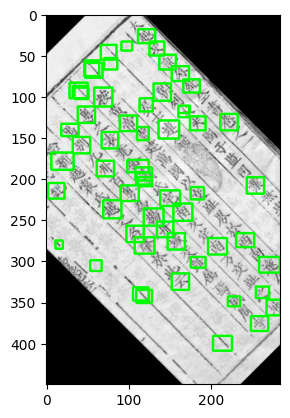

In [10]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/drive/MyDrive/wb_localization_dataset/DVSKTT_ngoai_I_1a.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res

# Rotate the grayscale image
img_gray_rotated = rotate_image(img, 45)
# Make a prediction
results = model.predict(source=img_gray_rotated, save=False, stream=True)
print(type(results))
# Visualize the results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    print(f"Number of detected objects: {len(boxes)}")
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img_gray_rotated, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    plt.imshow(img_gray_rotated)